1  : 0.98
2  : 0.98
3  : 0.975
4  : 0.9775
5  : 0.9825
6  : 0.985
7  : 0.9825
8  : 0.985
9  : 0.9825
10  : 0.99
11  : 0.985
12  : 0.9925
13  : 0.9875
14  : 0.985
15  : 0.985
16  : 0.9825
17  : 0.9825
18  : 0.9825
19  : 0.9825
Наиболее оптимальное k:  12


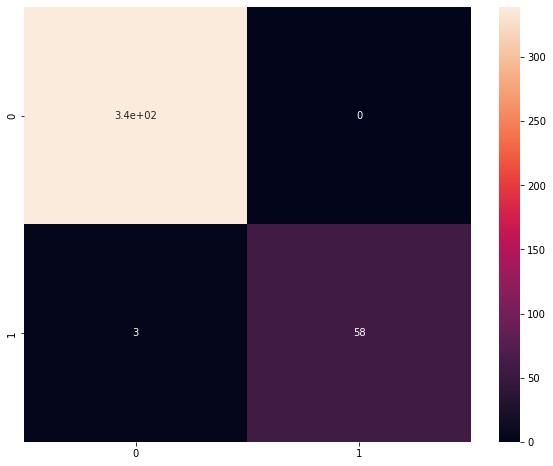

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('credit_data.csv', index_col='clientid')
data = data.dropna(axis=0)

y = data.default
X = data.drop(columns=['default'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,
                                                    random_state=42)

accuracy = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
    _print(k, " :", accuracy_score(y_test, knn.predict(X_test)))

print('Наиболее оптимальное k: ', accuracy.index(max(accuracy)) + 1)


knn = KNeighborsClassifier(12, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
cm = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)


In [ ]:
data

,income,age,loan,default
clientid,,,,
1,66155.92510,59.017015,8106.532131,0
2,34415.15397,48.117153,6564.745018,0
3,57317.17006,63.108049,8020.953296,0
4,42709.53420,45.751972,6103.642260,0
5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1996,59221.04487,48.518179,1926.729397,0
1997,69516.12757,23.162104,3503.176156,0
1998,44311.44926,28.017167,5522.786693,1
